In [3]:
import json
import os
import subprocess

import numpy as np
from pathlib import Path
import yaml
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.ticker import MaxNLocator
import lossmaps as lm
import xobjects as xo

import xtrack as xt
import xcoll as xc

import lossmaps as lm

# Load

In [4]:
path = '/afs/cern.ch/work/c/cmaccani/xsuite_sim/twocryst_sim/Condor/'

In [52]:
n_test = 'TEST_B2V_align_test_CRY6.0'
prefix_name =  'TEST_B2V_align_test_CRY5.0_15_'

In [53]:
#n_old = int(subprocess.check_output("find "+ path + n_test +" -maxdepth 1 -mindepth 1 -type d | wc -l", shell=True))
#n = int(subprocess.check_output("find "+ path + n_test +" -maxdepth 1 -mindepth 1 -type d | grep Job. | wc -l", shell=True))
test_list = (subprocess.check_output("find "+ path +" -maxdepth 1 -mindepth 1 -type d | grep " + prefix_name, shell=True)).decode('ascii').strip().splitlines()

In [54]:
test_list

['/afs/cern.ch/work/c/cmaccani/xsuite_sim/twocryst_sim/Condor/TEST_B2V_align_test_CRY5.0_15__20231110-1733']

In [55]:
    for test_name in test_list:

        n_jobs = int(subprocess.check_output("find "+ test_name +" -maxdepth 1 -mindepth 1 -type d | grep Job. | wc -l", shell=True))

        losses_json =[]

        for i in range(n_jobs):
            file_path = (subprocess.check_output("echo " + test_name + '/Job.' + str(i) + '/Outputdata/lossmap*.json', shell=True)).decode('ascii').strip()
            if os.path.exists(file_path):
                losses_json.append(file_path)

        n_jobs_verify  = len(losses_json)
        if n_jobs != n_jobs_verify:
            print("!!! Succesful Jobs: ", n_jobs_verify, '/', n_jobs, ' in file: ', test_name)

In [56]:
losses_json

['/afs/cern.ch/work/c/cmaccani/xsuite_sim/twocryst_sim/Condor/TEST_B2V_align_test_CRY5.0_15__20231110-1733/Job.0/Outputdata/lossmap_B2V.json',
 '/afs/cern.ch/work/c/cmaccani/xsuite_sim/twocryst_sim/Condor/TEST_B2V_align_test_CRY5.0_15__20231110-1733/Job.1/Outputdata/lossmap_B2V.json',
 '/afs/cern.ch/work/c/cmaccani/xsuite_sim/twocryst_sim/Condor/TEST_B2V_align_test_CRY5.0_15__20231110-1733/Job.2/Outputdata/lossmap_B2V.json',
 '/afs/cern.ch/work/c/cmaccani/xsuite_sim/twocryst_sim/Condor/TEST_B2V_align_test_CRY5.0_15__20231110-1733/Job.3/Outputdata/lossmap_B2V.json',
 '/afs/cern.ch/work/c/cmaccani/xsuite_sim/twocryst_sim/Condor/TEST_B2V_align_test_CRY5.0_15__20231110-1733/Job.4/Outputdata/lossmap_B2V.json',
 '/afs/cern.ch/work/c/cmaccani/xsuite_sim/twocryst_sim/Condor/TEST_B2V_align_test_CRY5.0_15__20231110-1733/Job.5/Outputdata/lossmap_B2V.json',
 '/afs/cern.ch/work/c/cmaccani/xsuite_sim/twocryst_sim/Condor/TEST_B2V_align_test_CRY5.0_15__20231110-1733/Job.6/Outputdata/lossmap_B2V.json',

In [57]:
ThisLM = lm.SimulatedLossMap(lmtype=lm.LMType.B2V, machine=lm.Machine.LHC)

In [58]:
#ThisLM.load_data_json(json_files=losses_json)
ThisLM.load_data_json(json_files=losses_json)

Maximum inefficiency in the DS is 2.04e-05.


(<Figure size 2000x1200 with 3 Axes>,
 array([<Axes: xlabel='S [m]', ylabel='Norm. inefficiency [arb. unit]'>,
        <Axes: >,
        <Axes: xlabel='S [m]', ylabel='Norm. inefficiency [arb. unit]'>],
       dtype=object))

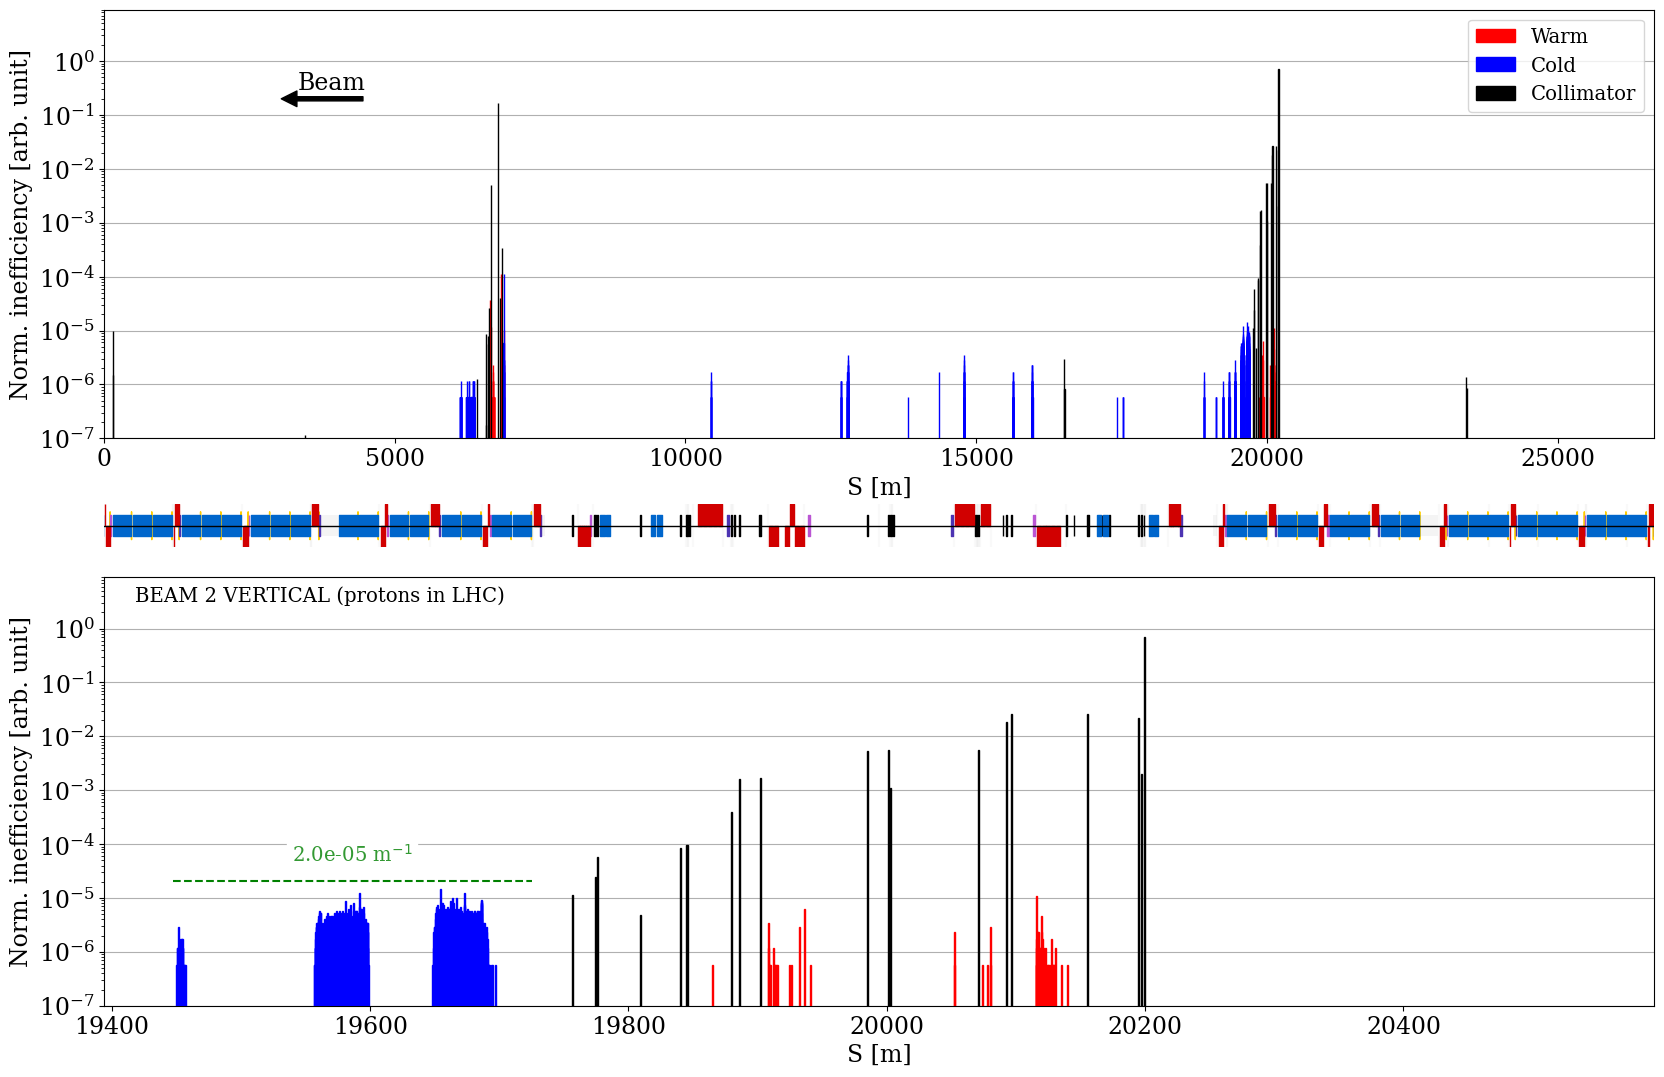

In [59]:
lm.plot_lossmap(ThisLM, zoom=True, layout="./input_files/layout_flat_top_b2.tfs",  outfile = "./Outputdata/TEST_False2.png")  #, outfile = "./Outputdata/Lossmap_outputs/"+outfile_name

In [60]:
lm.plot_lossmap_interactive(ThisLM, norm='total', layout="./input_files/layout_flat_top_b2.tfs")  #

Box(children=(Dropdown(description='norm', index=3, options=('none', 'max', 'coll_max', 'total'), value='total…

FigureWidget({
    'data': [{'base': 1e-17,
              'hovertemplate': 'S=%{x:.2f} m, value=%{y:1.2e}<br>%{hovertext}',
              'hovertext': array([ 166.,  167.,  168.,  169.,  170.,  171.,  172.,  173.,  174.,  175.,
                                   177.,  178.,  179.,  180.,  181.,  182.,  183.,  184.,  185.,  186.,
                                   187.,  188.,  189.,  190.,  191.,  192.,  193.,  194.,  195.,  196.,
                                   197.,  198.,  199.,  200.,  201.,  204.,  239.,  240.,  241.,  242.,
                                  1269., 1273., 1274., 1275., 1276., 1277., 1278., 1279., 1280., 1281.,
                                  1282., 1283., 1284., 1285., 1286., 1287., 1288., 1292., 1293., 1295.,
                                  1296., 1297., 1298., 1301., 1302., 1303., 1304., 1305., 1306., 1307.,
                                  1308., 1309., 1310., 1311., 1312., 1313., 1314., 1315., 1316., 1317.,
                                  1318., 131

In [61]:
losses_df = ThisLM._losses
losses_df[losses_df['name']=='tcla.a5l3.b2']

#'target.4l3.b2'

#loss_tcp = int(losses_df[losses_df['name']=='tcp.d6r7.b2']['losses'])

,s,name,losses_type,losses
162,6574.220794,tcla.a5l3.b2,Losses.COLL,152.0


# BEAM LINE TEST

In [18]:
line = xt.Line.from_json('input_files/flat_top_b2.json')
end_s = line.get_length()

context = xo.ContextCpu(omp_num_threads='auto')

TCCS_loc = end_s - 6773.7 #6775
TCCP_loc = end_s - 6653.3 #6655
TARGET_loc = end_s - (6653.3 + 0.07/2 +0.005/2)



line.insert_element(at_s=TCCS_loc, element=xt.Marker(), name='tccs.5r3.b2')
line.insert_element(at_s=TCCS_loc, element=xt.LimitEllipse(a_squ=0.0016, b_squ=0.0016, a_b_squ=2.56e-06), name='tccs.5r3.b2_aper')
line.insert_element(at_s=TCCP_loc, element=xt.Marker(), name='tccp.4l3.b2')
line.insert_element(at_s=TCCP_loc, element=xt.LimitEllipse(a_squ=0.0016, b_squ=0.0016, a_b_squ=2.56e-06), name='tccp.4l3.b2_aper')
line.insert_element(at_s=TARGET_loc, element=xt.Marker(), name='target.4l3.b2')
line.insert_element(at_s=TARGET_loc, element=xt.LimitEllipse(a_squ=0.0016, b_squ=0.0016, a_b_squ=2.56e-06), name='target.4l3.b2_aper')


# Initialise collmanager
coll_manager = xc.CollimatorManager.from_yaml('input_files/flat_top.yaml', line=line, beam=2, _context=context, ignore_crystals=False)
#print(coll_manager.collimator_names)

coll_manager.install_everest_collimators(verbose=True)


Done loading line from dict.           
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Installing tcl.4l1.b2           as EverestCollimator
Installing tcl.5l1.b2           as EverestCollimator
Installing tcl.6l1.b2           as EverestCollimator
Installing tctph.4r8.b2         as EverestCollimator
Installing tctpv.4r8.b2         as EverestCollimator
Installing tdisa.a4r8.b2        as EverestCollimator
Installing tdisb.a4r8.b2        as EverestCollimator
Installing tdisc.a4r8.b2        as EverestCollimator
Installing tclia.4l8            as EverestCollimator
Installing tclib.6l8.b2         as EverestCollimator
Installing tcp.d6r7.b2          as EverestCollimator
Installing tcp.c6r7.b2          as EverestCollimator
Installing tcp.b6r7.b2          as EverestCollimator
Installing tcsg.a6r7.b2         as EverestCollimator
Installing tcsg.b5r7.b2         as EverestCollimator
Installing tcsg.a5r7.b2         as EverestCollimator
Installing tcsg.d4r7.b2         as EverestCol

In [19]:
abs_manager.install_black_absorbers(verbose=True)

NameError: name 'abs_manager' is not defined

### Line Analysis

In [20]:
stop = line.element_names.index('tcla.a5l3.b2')
start = line.element_names.index('tcsg.5r3.b2')

In [23]:
for i in range(start-400, stop+400):
    if (line.element_names[i].endswith('b2') and type(line[i]) !=  xt.beam_elements.elements.Marker) or line.element_names[i].startswith('ip'):
        print(line.element_names[i], '\t\t', end_s-line.get_s_elements()[i], '\t\t', line[i].__class__.__name__ )

mbw.d6r3.b2 		 6847.564790687997 		 Multipole
tcp.6r3.b2 		 6842.070291762997 		 EverestCollimator
tcapa.6r3.b2 		 6832.893793852007 		 Drift
mbw.c6r3.b2 		 6829.5417939640065 		 Multipole
mbw.b6r3.b2 		 6825.306793964006 		 Multipole
mbw.a6r3.b2 		 6821.071793964005 		 Multipole
bpmwe.a5r3.b2 		 6818.556293964008 		 Drift
tcapd.5r3.b2 		 6817.771793964006 		 Drift
tcsg.5r3.b2 		 6808.948793964006 		 EverestCollimator
bpmw.5r3.b2 		 6789.838293964007 		 Drift
mcbwv.5r3.b2 		 6786.043793964007 		 Multipole
tccs.5r3.b2 		 6773.702000000001 		 EverestCrystal
bpmwe.4r3.b2 		 6714.710293964006 		 Drift
bpmw.4r3.b2 		 6687.165293964008 		 Drift
mcbwh.4r3.b2 		 6683.420793964007 		 Multipole
ip3_aper 		 6664.720793964007 		 LimitRectEllipse
ip3 		 6664.720793964007 		 Marker
target.4l3.b2 		 6653.34 		 EverestCollimator
tccp.4l3.b2 		 6653.334999999999 		 EverestCrystal
mcbwv.4l3.b2 		 6643.690793964008 		 Multipole
bpmw.4l3.b2 		 6642.200293964008 		 Drift
tcsg.4l3.b2 		 6622.365793964007 		

In [ ]:
losses_df[(losses_df['s']>6650)&(losses_df['s']<6800)]

In [ ]:
ThisLM.inefficiency()

### PYMADX

In [ ]:
loss_cry1/loss_tcp

In [ ]:
import pymadx
name_pymadx_layout = "input_files/layout_file_b2_flattop.tfs"  
tfsobject= pymadx.Data.Tfs(name_pymadx_layout)

pymadx.Tfs.Load> normal file


In [ ]:
for i in tfsobject:
    print(i['S'])

In [ ]:
if tfsobject.header['SEQUENCE'] == 'LHCB2':
    machine_length = tfsobject.header['LENGTH']
    print("------------- BEAM2 LAYOUT INVERTED -------------")
    for i in range(len(tfsobject)):
        old_s = tfsobject[i]['S']
        tfsobject.EditComponent(i,'S', machine_length-old_s) 

In [ ]:
for i in tfsobject:
    print(i['S'])

In [ ]:
def _get_twiss_header(tfsfile):
    header = None
    line_no = 0

    gzipped = tfsfile.endswith(".gz")
    fopen = gzip.open if gzipped else open

    flag = "rb" if gzipped else "r"
    with fopen(tfsfile, flag) as filein:
        for idx, line in enumerate(filein):
            if gzipped:
                line = line.decode("utf-8")
            if line.startswith("*"):  # This is the header line, preamble lines start with @
                header = line.replace("*", "").strip().split()  # Strip the comment char
                line_no = idx + 1  # As zero counted
                break  # End the loop early - information found

    return header, line_no



def _load_layout_tfs(tfsfile):
    header, header_line_no = _get_twiss_header(tfsfile)

    required_columns = {"KEYWORD", "S", "L", "K1L", "NAME"}

    if not required_columns.issubset(set(required_columns)):
        raise KeyError("The required columns in the MAD-X"
                       " TFS file are: {}".format(" ".join(list(required_columns))))

    twiss = pd.read_csv(tfsfile, delim_whitespace=True, skiprows=header_line_no+1,
                        index_col=False, names=header)

    twiss = twiss[list(required_columns)] # Reduce the data fields
    twiss["NAME"] = twiss["NAME"].str.upper() # Make the names uppercase
    twiss = twiss.set_index("NAME")

    return twiss



def _make_layout_plotly(tfsfile):
    tfs_df = _load_layout_tfs(tfsfile)
    tfs_df = tfs_df[(tfs_df["L"] > 0) & (tfs_df["KEYWORD"] != "DRIFT")]

    lim = (tfs_df["S"].min(), tfs_df["S"].max())
    centres = tfs_df["S"] - tfs_df["L"]/2


In [ ]:
'LENGTH' in _get_twiss_header(name_pymadx_layout)[0]

False

In [ ]:
_get_twiss_header(name_pymadx_layout)

(['NAME',
  'KEYWORD',
  'S',
  'L',
  'K0L',
  'K1L',
  'K2L',
  'K3L',
  'K4L',
  'K1SL',
  'K2SL',
  'K3SL',
  'K4SL',
  'HKICK',
  'VKICK',
  'BETX',
  'BETY',
  'ALFX',
  'ALFY',
  'MUX',
  'MUY',
  'DX',
  'DY',
  'DPX',
  'DPY',
  'R11',
  'R12',
  'R22',
  'R21',
  'X',
  'PX',
  'Y',
  'PY',
  'T',
  'PT',
  'DELTAP',
  'VOLT',
  'LAG',
  'HARMON',
  'FREQ',
  'E1',
  'E2',
  'APERTYPE',
  'APER_1',
  'APER_2',
  'APER_3',
  'APER_4',
  'TILT',
  'ANGLE'],
 51)

# Test particles

In [62]:
def find_axis_intercepts(x_coords, y_coords):
    x_intercepts = []
    y_intercepts = []

    for i in range(len(x_coords)):
        x1, y1 = x_coords[i], y_coords[i]
        x2, y2 = x_coords[(i + 1) % len(x_coords)], y_coords[(i + 1) % len(y_coords)]

        if x1 == x2:
        # Vertical line, no y-intercept
            y_intercept = 0.0 if x1 == x2 == 0.0 else None
        else:
            slope = (y2 - y1) / (x2 - x1)
            y_intercept = y1 - (slope * x1)

        if y1 == y2:
        # Horizontal line, no x-intercept
            x_intercept = 0.0 if y1 == y2 == 0.0 else None
        else:
            slope = (x2 - x1) / (y2 - y1)
            x_intercept = x1 - (slope * y1)

        # Check if the x-intercept is within the range of x1 and x2
        if x_intercept is not None and (x1 <= x_intercept <= x2 or x2 <= x_intercept <= x1):
            x_intercepts.append(x_intercept)

        # Check if the y-intercept is within the range of y1 and y2
        if y_intercept is not None and (y1 <= y_intercept <= y2 or y2 <= y_intercept <= y1):
            y_intercepts.append(y_intercept)

    return x_intercepts, y_intercepts



def find_bad_offset_apertures(line):
    aperture_offsets = {}
    for name, element in line.element_dict.items():
        if 'offset' in name and element.__class__.__name__.startswith('XYShift'):
            aper_name = name.split('_offset')[0]
            aperture_offsets[aper_name] = (element.dx, element.dy)

    bad_apers = {}
    print('vmabc.4l2.b.b2_aper' in aperture_offsets.keys())
    for ap_name, offset in aperture_offsets.items():
        aperture_el = line.element_dict[ap_name]

        cname= aperture_el.__class__.__name__
        ap_dict = aperture_el.to_dict()

        if cname == 'LimitEllipse':
            x_min = -ap_dict['a']
            x_max = ap_dict['a']
            y_min = -ap_dict['b']
            y_max = ap_dict['b']
        elif cname == 'LimitRect':
            x_min = ap_dict['min_x']
            x_max = ap_dict['max_x']
            y_min = ap_dict['min_y']
            y_max = ap_dict['max_y']
        elif cname == 'LimitRectEllipse':
            x_min = -ap_dict['max_x']
            x_max = ap_dict['max_x']
            y_min = -ap_dict['max_y']
            y_max = ap_dict['max_y']
        elif cname == 'LimitRacetrack':
            x_min = ap_dict['min_x']
            x_max = ap_dict['max_x']
            y_min = ap_dict['min_y']
            y_max = ap_dict['max_y']
        elif cname == 'LimitPolygon':
            x_intercepts, y_intercepts = find_axis_intercepts(ap_dict['x_vertices'],
                                                            ap_dict['y_vertices'])
            x_min = min(x_intercepts)
            x_max = max(x_intercepts)
            y_min = min(y_intercepts)
            y_max = max(y_intercepts)

        tolerance = 5e-3
        """if (x_max - offset[0] < tolerance 
            or -x_min + offset[0] < tolerance 
            or y_max - offset[1] < tolerance 
            or -y_min + offset[1] < tolerance):"""
        if (offset[0] -x_max > tolerance 
            or  -offset[0] + x_min > tolerance 
            or  offset[1] - y_max > tolerance 
            or  -offset[1] + y_min > tolerance ):
                bad_apers[ap_name] = (x_min, x_max, y_min, y_max, offset[0], offset[1])

    return bad_apers



In [63]:
    config_file ='config_sim.yaml'

    with open(config_file, 'r') as stream:
        config_dict = yaml.safe_load(stream)


    context = xo.ContextCpu(omp_num_threads='auto')

    sub_dict = config_dict['run']
    file_dict = config_dict['input_files']


    beam          = sub_dict['beam']
    plane         = sub_dict['plane']

    num_turns     = sub_dict['turns']
    num_particles = sub_dict['nparticles']
    engine        = sub_dict['engine']

    TTCS_align_angle_step = sub_dict['TTCS_align_angle_step']


    # Load from json
    line = xt.Line.from_json(file_dict[f'line_b{beam}'])

    end_s = line.get_length()


    TCCS_loc = end_s - 6773.7 #6775
    TCCP_loc = end_s - 6653.3 #6655
    TARGET_loc = end_s - (6653.3 + 0.07/2 +0.005/2)


    line.insert_element(at_s=TCCS_loc, element=xt.Marker(), name='tccs.5r3.b2')
    line.insert_element(at_s=TCCS_loc, element=xt.LimitEllipse(a_squ=0.0016, b_squ=0.0016, a_b_squ=2.56e-06), name='tccs.5r3.b2_aper')
    line.insert_element(at_s=TCCP_loc, element=xt.Marker(), name='tccp.4l3.b2')
    line.insert_element(at_s=TCCP_loc, element=xt.LimitEllipse(a_squ=0.0016, b_squ=0.0016, a_b_squ=2.56e-06), name='tccp.4l3.b2_aper')
    line.insert_element(at_s=TARGET_loc, element=xt.Marker(), name='target.4l3.b2')
    line.insert_element(at_s=TARGET_loc, element=xt.LimitEllipse(a_squ=0.0016, b_squ=0.0016, a_b_squ=2.56e-06), name='target.4l3.b2_aper')


    bad_aper = find_bad_offset_apertures(line)
    print('Bad apertures : ', bad_aper)
    print('Replace bad apertures with Marker')
    for name in bad_aper.keys():
        line.element_dict[name] = xt.Marker()
        print(line.element_dict[name])



    # Aperture model check
    print('\nAperture model check on imported model:')
    df_imported = line.check_aperture()
    assert not np.any(df_imported.has_aperture_problem)

    coll_manager = xc.CollimatorManager.from_yaml(file_dict['collimators'], line=line, beam=beam, _context=context, ignore_crystals=False)

    if engine == 'everest':
        coll_names = coll_manager.collimator_names
        black_absorbers = ['target.4l3.b2', 'tccs.5r3.b2']
        everest_colls = [name for name in coll_names if name not in black_absorbers]
        coll_manager.install_everest_collimators(names=everest_colls,verbose=True)
        coll_manager.install_black_absorbers(names = black_absorbers, verbose=True)
    else:
        raise ValueError(f"Unknown scattering engine {engine}!")


    # Aperture model check
    print('\nAperture model check after introducing collimators:')
    df_with_coll = line.check_aperture()
    assert not np.any(df_with_coll.has_aperture_problem)

        
    # Build the tracker
    coll_manager.build_tracker()

    coll_manager.set_openings()


    TTCS_name = 'tccs.5r3.b2'

    # Aperture model check
    print('\nAperture model check after introducing collimators:')
    df_with_coll = line.check_aperture()




Done loading line from dict.           
True
Bad apertures :  {'tctph.4r8.a.b2_aper': (-0.04, 0.04, -0.04, 0.04, 0.16672558295218318, -0.0), 'vmabc.4l2.b.b2_aper': (-0.0315, 0.0315, -0.0315, 0.0315, -0.18383135991897473, -0.0)}
Replace bad apertures with Marker
Marker(_dummy=0)
Marker(_dummy=0)

Aperture model check on imported model:
Done checking aperture.           
0 thin elements miss associated aperture (upstream):
[]
0 thick elements miss associated aperture (upstream or downstream):
[]
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Installing tcl.4l1.b2           as EverestCollimator
Installing tcl.5l1.b2           as EverestCollimator
Installing tcl.6l1.b2           as EverestCollimator
Installing tctph.4r8.b2         as EverestCollimator
Installing tctpv.4r8.b2         as EverestCollimator
Installing tdisa.a4r8.b2        as EverestCollimator
Installing tdisb.a4r8.b2        as EverestCollimator
Installing tdisc.a4r8.b2        as EverestCollimator
Installing

/cvmfs/sft.cern.ch/lcg/views/LCG_104a/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in minimum

/cvmfs/sft.cern.ch/lcg/views/LCG_104a/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in minimum




Aperture model check after introducing collimators:
Done checking aperture.           
0 thin elements miss associated aperture (upstream):
[]
0 thick elements miss associated aperture (upstream or downstream):
[]


In [64]:
#df_new =  pd.read_hdf('/afs/cern.ch/work/c/cmaccani/xsuite_sim/twocryst_sim/Condor/TEST_B2V_ABS_CRY1__20231113-1818/Job.77/Outputdata/particles_B2V.h5')

In [65]:
    prefix_name = 'TEST_B2V_ABS_CRY1_5.5_'
    Condor_path = '/afs/cern.ch/work/c/cmaccani/xsuite_sim/twocryst_sim/Condor/'
    test_list = [Condor_path + i for i in os.listdir(Condor_path) if prefix_name in i]
    
    for test_name in test_list:

        job_directories = [test_name + '/' + i for i in os.listdir(test_name) if 'Job.' in i]
        n_jobs = len(job_directories)  
        df_particles =  pd.DataFrame()

        n_jobs_verify = 0 

        for job_dir in job_directories:
                part_file = [filename for filename in os.listdir(job_dir +'/Outputdata') if filename.startswith("particles_")]
                if part_file:
                    df_tmp = pd.read_hdf(job_dir +'/Outputdata/' + part_file[0])
                    df_particles = pd.concat([df_particles, df_tmp])
                    n_jobs_verify = n_jobs_verify + 1 


        if n_jobs != n_jobs_verify:
            print("!!! Succesful Jobs: ", n_jobs_verify, '/', n_jobs, ' in file: ', test_name)

In [66]:
df_particles

,start_tracking_at_element,q0,mass0,s,zeta,chi,charge_ratio,weight,pdg_id,particle_id,...,y,px,py,delta,ptau,rvv,rpp,p0c,beta0,gamma0
0,-1,1.0,9.382721e+08,0.000000,1.626747e-03,1.0,1.0,1.0,0,0,...,0.000154,2.075800e-06,-0.000132,0.000003,2.521238e-06,1.0,0.999997,6.800000e+12,1.0,7247.364689
1,-1,1.0,9.382721e+08,0.000000,1.083218e-03,1.0,1.0,1.0,0,96852,...,-0.000154,1.928001e-06,-0.000137,0.000003,2.829261e-06,1.0,0.999997,6.800000e+12,1.0,7247.364689
2,-1,1.0,9.382721e+08,0.000000,1.095279e-03,1.0,1.0,1.0,0,98717,...,-0.000154,-1.749762e-06,-0.000137,0.000002,1.948604e-06,1.0,0.999998,6.800000e+12,1.0,7247.364689
3,-1,1.0,9.382721e+08,0.000000,5.631893e-03,1.0,1.0,1.0,0,46329,...,0.000151,5.345611e-06,-0.000121,0.000007,6.663331e-06,1.0,0.999993,6.800000e+12,1.0,7247.364689
4,-1,1.0,9.382721e+08,0.000000,1.782314e-03,1.0,1.0,1.0,0,28658,...,0.000154,5.756511e-06,-0.000133,0.000003,3.217580e-06,1.0,0.999997,6.800000e+12,1.0,7247.364689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-1,1.0,9.382721e+08,6459.442798,4.561431e-11,1.0,1.0,1.0,0,16,...,0.000920,4.162148e-08,0.000012,0.000000,0.000000e+00,1.0,1.000000,6.800000e+12,1.0,7247.364689
99996,-1,1.0,9.382721e+08,6459.442798,4.668479e-11,1.0,1.0,1.0,0,15,...,0.000919,4.224676e-08,0.000012,0.000000,-2.117582e-22,1.0,1.000000,6.800000e+12,1.0,7247.364689
99997,-1,1.0,9.382721e+08,6459.442798,4.439795e-11,1.0,1.0,1.0,0,12,...,0.000920,6.706577e-08,0.000012,0.000000,-2.117582e-22,1.0,1.000000,6.800000e+12,1.0,7247.364689
99998,-1,1.0,9.382721e+08,6459.442798,4.553651e-11,1.0,1.0,1.0,0,99998,...,-0.000919,8.485162e-08,-0.000012,0.000000,0.000000e+00,1.0,1.000000,6.800000e+12,1.0,7247.364689


In [67]:
line_coll = coll_manager.line
TCCS_idx = line_coll.element_names.index('tccs.5r3.b2')
cry_impact_parts = df_particles[(df_particles.at_element == TCCS_idx) & (df_particles.state<0)]

In [68]:
cry_impact_parts

,start_tracking_at_element,q0,mass0,s,zeta,chi,charge_ratio,weight,pdg_id,particle_id,...,y,px,py,delta,ptau,rvv,rpp,p0c,beta0,gamma0
7886,-1,1.0,9.382721e+08,19885.181172,0.004646,1.0,1.0,1.0,0,31611,...,0.002140,1.150742e-06,-0.000015,-0.000105,-0.000105,1.0,1.000105,6.800000e+12,1.0,7247.364689
9295,-1,1.0,9.382721e+08,19885.181172,0.010652,1.0,1.0,1.0,0,8566,...,0.001953,-8.796302e-07,-0.000021,-0.000091,-0.000091,1.0,1.000091,6.800000e+12,1.0,7247.364689
13605,-1,1.0,9.382721e+08,19885.181172,0.012873,1.0,1.0,1.0,0,93386,...,0.001982,-1.634671e-05,-0.000016,-0.001871,-0.001871,1.0,1.001874,6.800000e+12,1.0,7247.364689
14328,-1,1.0,9.382721e+08,19885.181172,0.004834,1.0,1.0,1.0,0,62111,...,0.002025,-4.137996e-07,-0.000009,-0.000117,-0.000117,1.0,1.000117,6.800000e+12,1.0,7247.364689
14338,-1,1.0,9.382721e+08,19885.181172,0.008782,1.0,1.0,1.0,0,17495,...,0.001871,-8.216563e-07,-0.000018,-0.000046,-0.000046,1.0,1.000046,6.800000e+12,1.0,7247.364689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88216,-1,1.0,9.382721e+08,19885.181172,0.000173,1.0,1.0,1.0,0,81005,...,0.001908,-7.878088e-06,-0.000009,-0.000034,-0.000034,1.0,1.000034,6.800000e+12,1.0,7247.364689
88217,-1,1.0,9.382721e+08,19885.181172,0.000339,1.0,1.0,1.0,0,74645,...,0.002221,9.207459e-06,-0.000012,-0.000073,-0.000073,1.0,1.000073,6.800000e+12,1.0,7247.364689
88218,-1,1.0,9.382721e+08,19885.181172,0.000294,1.0,1.0,1.0,0,94124,...,0.001969,-7.273146e-06,-0.000009,-0.000061,-0.000061,1.0,1.000061,6.800000e+12,1.0,7247.364689
88219,-1,1.0,9.382721e+08,19885.181172,0.000469,1.0,1.0,1.0,0,54576,...,0.003295,-9.150855e-07,-0.000018,-0.000099,-0.000099,1.0,1.000099,6.800000e+12,1.0,7247.364689


In [69]:
losses_df = ThisLM._losses
int(losses_df[losses_df['name']=='tccs.5r3.b2']['losses'])

2922250

In [70]:
int(losses_df[losses_df['name']=='tccs.5r3.b2']['losses'])*0.004

11689.0

In [71]:
twiss=line_coll.twiss()
TCCS_name = 'tccs.5r3.b2'
beta_y_optics = twiss['bety',TCCS_name]
alfa_y_optics = twiss['alfy',TCCS_name]

part_ref_dict = json.load(open(file_dict[f'line_b{beam}']))['particle_ref']
critical_angle = np.sqrt(2*16/(part_ref_dict['p0c'][0]*part_ref_dict['beta0'][0]))

normalized_emittance = 3.5e-6
emittance_phy = normalized_emittance/(part_ref_dict['beta0'][0]*part_ref_dict['gamma0'][0])

n_sig = 5.5 

py_central = - n_sig * alfa_y_optics * np.sqrt(emittance_phy/beta_y_optics)

In [72]:
critical_angle

2.1693045988364824e-06

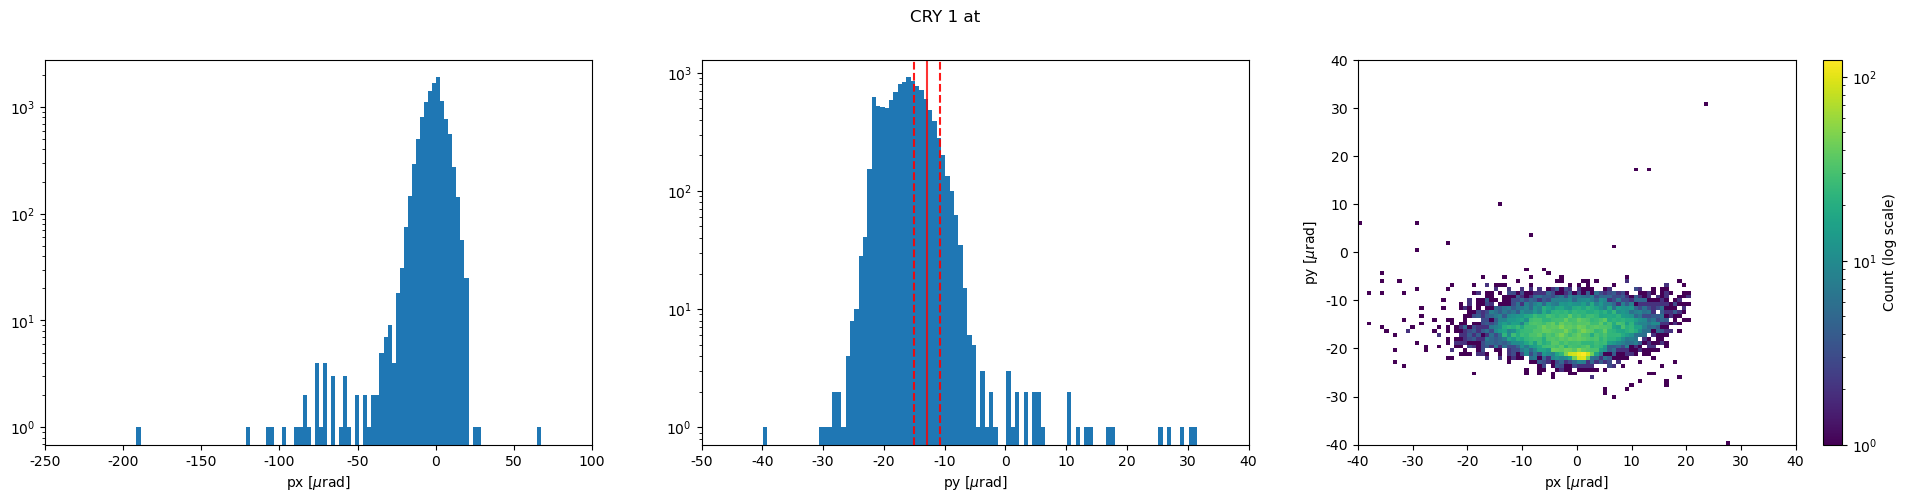

In [73]:

    fig1 = plt.figure( figsize=(24, 5))
    ax1 = fig1.add_subplot(1,3,1)
    ax1.hist(cry_impact_parts['px'], bins=100)
    ax1.set_xlabel(r'px [$\mu$rad]')
    ax1.set_ylabel("")
    ax1.set_yscale("log")
    precision = 6  # Set the desired precision
    ax1.set_xticks(ticks=plt.xticks()[0], labels=[f"{x*1e6:.{0}f}" for x in plt.xticks()[0]])
    #ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)


    ax2 = fig1.add_subplot(1,3,2)
    ax2.hist(cry_impact_parts['py'], bins=100) 
    ax2.set_xlabel(r'py [$\mu$rad]')
    ax2.set_ylabel('')
    ax2.set_yscale("log")
    ax2.axvline(py_central, color = 'red', linestyle = '-', alpha = 0.8)
    ax2.axvline(py_central + critical_angle, color = 'red', linestyle = '--', alpha = 0.9)
    ax2.axvline(py_central - critical_angle, color = 'red', linestyle = '--', alpha = 0.9)
    ax2.set_xticks(ticks=plt.xticks()[0], labels=[f"{x*1e6:.{0}f}" for x in plt.xticks()[0]])
    #ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)

    ax3 = fig1.add_subplot(1,3,3)
    h = ax3.hist2d(cry_impact_parts['px'], cry_impact_parts['py'], bins=100, norm=matplotlib.colors.LogNorm(), range = ([-40e-6, 40e-6], [-40e-6,40e-6])) 
    ax3.set_xlabel(r'px [$\mu$rad]')
    ax3.set_ylabel(r'py [$\mu$rad]')
    ax3.set_xticks(ticks=plt.xticks()[0], labels=[f"{x*1e6:.{0}f}" for x in plt.xticks()[0]])
    ax3.set_yticks(ticks=plt.yticks()[0], labels=[f"{y*1e6:.{0}f}" for y in plt.yticks()[0]])
    fig1.colorbar(h[3], orientation='vertical', label='Count (log scale)')

    fig1.suptitle('CRY 1 at')
    #ax3.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
    #ax3.ticklabel_format(style='sci', axis='y'
    # , scilimits=(0,0), useMathText=True)

    fig1.savefig("./Outputdata/impact_angles_test.png")

Text(0.5, 0.98, 'CRY 1 at')

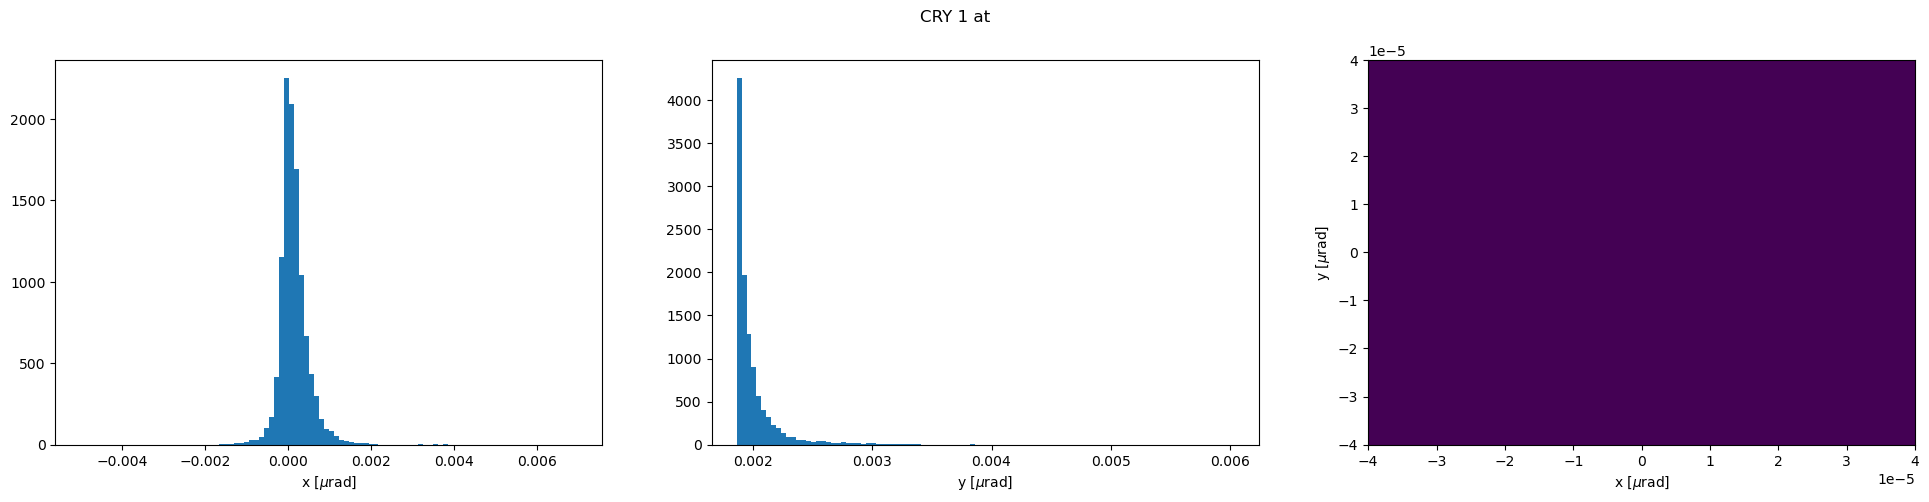

In [77]:
    fig1 = plt.figure( figsize=(24, 5))
    ax1 = fig1.add_subplot(1,3,1)
    ax1.hist(cry_impact_parts['x'], bins=100)
    ax1.set_xlabel(r'x [$\mu$rad]')
    ax1.set_ylabel("")
    #ax1.set_yscale("log")
    #precision = 6  # Set the desired precision
    #ax1.set_xticks(ticks=plt.xticks()[0], labels=[f"{x*1e6:.{0}f}" for x in plt.xticks()[0]])
    #ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)


    ax2 = fig1.add_subplot(1,3,2)
    ax2.hist(cry_impact_parts['y'], bins=100) 
    ax2.set_xlabel(r'y [$\mu$rad]')
    #ax2.set_ylabel('')
    #ax2.set_yscale("log")
    #ax2.axvline(py_central, color = 'red', linestyle = '-', alpha = 0.8)
    #ax2.axvline(py_central + critical_angle, color = 'red', linestyle = '--', alpha = 0.9)
    #ax2.axvline(py_central - critical_angle, color = 'red', linestyle = '--', alpha = 0.9)
    #ax2.set_xticks(ticks=plt.xticks()[0], labels=[f"{x*1e6:.{0}f}" for x in plt.xticks()[0]])
    #ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)

    ax3 = fig1.add_subplot(1,3,3)
    h = ax3.hist2d(cry_impact_parts['x'], cry_impact_parts['y'], bins=100, norm=matplotlib.colors.LogNorm(), range = ([-40e-6, 40e-6], [-40e-6,40e-6])) 
    ax3.set_xlabel(r'x [$\mu$rad]')
    ax3.set_ylabel(r'y [$\mu$rad]')
    #ax3.set_xticks(ticks=plt.xticks()[0], labels=[f"{x*1e6:.{0}f}" for x in plt.xticks()[0]])
    #ax3.set_yticks(ticks=plt.yticks()[0], labels=[f"{y*1e6:.{0}f}" for y in plt.yticks()[0]])
    #fig1.colorbar(h[3], orientation='vertical', label='Count (log scale)')

    fig1.suptitle('CRY 1 at')
    #ax3.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
    #ax3.ticklabel_format(style='sci', axis='y'
    # , scilimits=(0,0), useMathText=True)

    #fig1.savefig("./Outputdata/impact_position_test.png")

In [33]:
    config_file ='config_sim.yaml'

    with open(config_file, 'r') as stream:
        config_dict = yaml.safe_load(stream)


    coll_file = config_dict['input_files']['collimators']
    with open(coll_file, 'r') as stream:
        coll_dict = yaml.safe_load(stream)['collimators']['b'+config_dict['run']['beam']]

In [35]:
    TCP_name = 'tcp.d6r7.b2'
    TCCS_name = 'tccs.5r3.b2'
    Target_name = 'target.4l3.b2'
    TCLA_name = 'tcla.a5l3.b2'

In [37]:
coll_dict[TCP_name]['length']

0.6

In [27]:
config_dict['run']['beam']

'2'